# Фрактальные графы и графы с географической привязкой данных

###1.	Реализовать алгоритм построения предфрактального графа 4-ой итерации с помощью операции замещения вершины затравкой (пример на рис. 1)

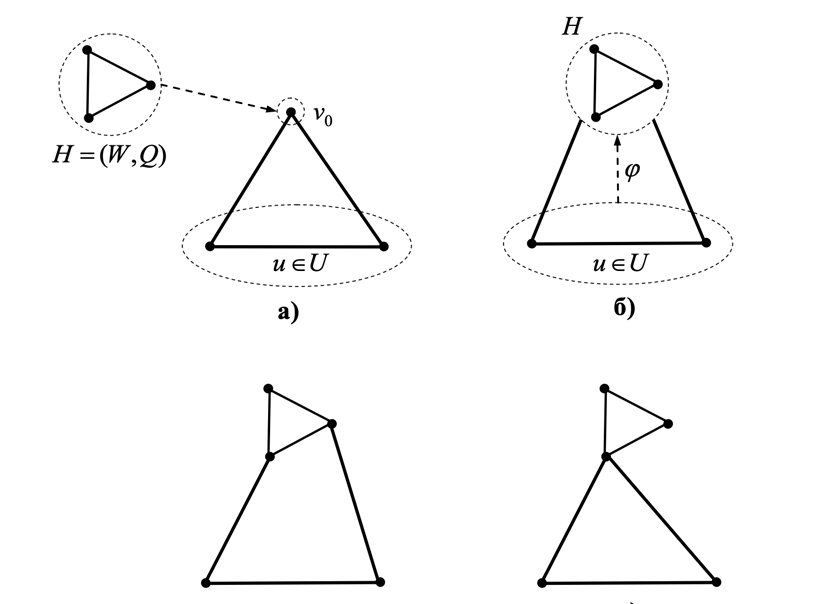

В качестве теоретических данных можно использовать материалы статей https://cyberleninka.ru/article/n/fraktalnye-i-predfraktalnye-grafy-osnovnye-opredeleniya-i-oboznacheniya/viewer и https://www.keldysh.ru/papers/2003/prep83/prep2003_83.html.

#### **Сначала попробую заменить одну вершину**

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [31]:
def generate_triangle_graph():
    graph = nx.Graph()
    graph.add_nodes_from([1, 2, 3])
    graph.add_edges_from([(1, 2), (2, 3), (3, 1)])

    return graph

In [32]:
def generate_fractal_graph(triangle_graph):
    fractal_graph = triangle_graph.copy()
    fractal_graph.remove_node(1)

    # Добавляем треугольник
    new_nodes = max(triangle_graph.nodes) + 1, max(triangle_graph.nodes) + 2, max(triangle_graph.nodes) + 3
    fractal_graph.add_nodes_from(new_nodes)
    fractal_graph.add_edges_from([(new_nodes[0], new_nodes[1]), (new_nodes[1], new_nodes[2]), (new_nodes[2], new_nodes[0])])

    # Соединяем новую крайнюю вершину с вершинами треугольника
    for node in [2, 3]:
        fractal_graph.add_edge(new_nodes[0], node)

    return fractal_graph

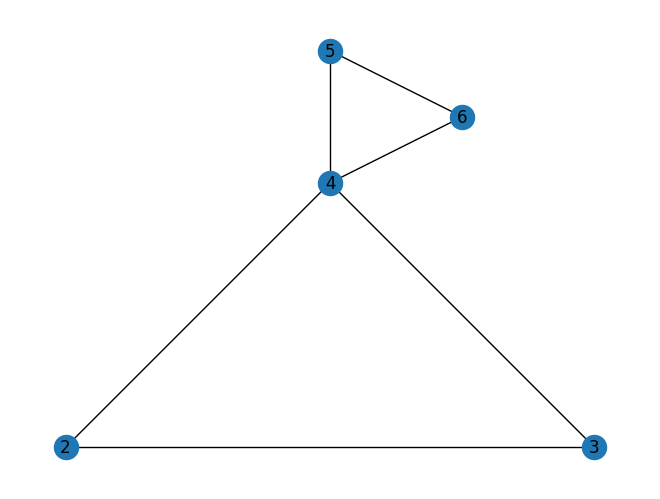

In [43]:
triangle_graph = generate_triangle_graph()
fractal_graph = generate_fractal_graph(triangle_graph)

pos = {
    1: (1, 2),
    2: (0, 0),
    3: (2, 0),
    max(triangle_graph.nodes) + 1: (1, 2),
    max(triangle_graph.nodes) + 2: (1, 3),
    max(triangle_graph.nodes) + 3: (1.5, 2.5)
}

nx.draw(fractal_graph, pos, with_labels=True)
plt.show()

#### Возможная реализация

In [116]:
def generate_polygon_graph(n):
    graph = nx.Graph()
    nodes = range(1, n + 1)
    graph.add_nodes_from(nodes)
    for i in range(1, n):
        graph.add_edge(i, i + 1)
    graph.add_edge(n, 1)
    return graph

In [117]:
def add_triangle_to_node(fractal_graph, node):
    new_nodes = max(fractal_graph.nodes) + 1, max(fractal_graph.nodes) + 2, max(fractal_graph.nodes) + 3
    fractal_graph.add_nodes_from(new_nodes)
    fractal_graph.add_edges_from([(new_nodes[0], new_nodes[1]), (new_nodes[1], new_nodes[2]), (new_nodes[2], new_nodes[0])])

    # Получаем соседние вершины для текущей вершины
    neighbors = list(fractal_graph.neighbors(node))

    # Соединяем новую крайнюю вершину с соседними вершинами треугольника
    for adjacent_node in neighbors:
        fractal_graph.add_edge(new_nodes[0], adjacent_node)

    return fractal_graph

In [118]:
def generate_fractal_graph(polygon_graph):
    fractal_graph = polygon_graph.copy()
    for node in polygon_graph.nodes:
        fractal_graph = add_triangle_to_node(fractal_graph, node)

    # Удаляем исходные вершины
    for node in polygon_graph.nodes:
        fractal_graph.remove_node(node)

    return fractal_graph

Введите количество вершин начальной фигуры: 3


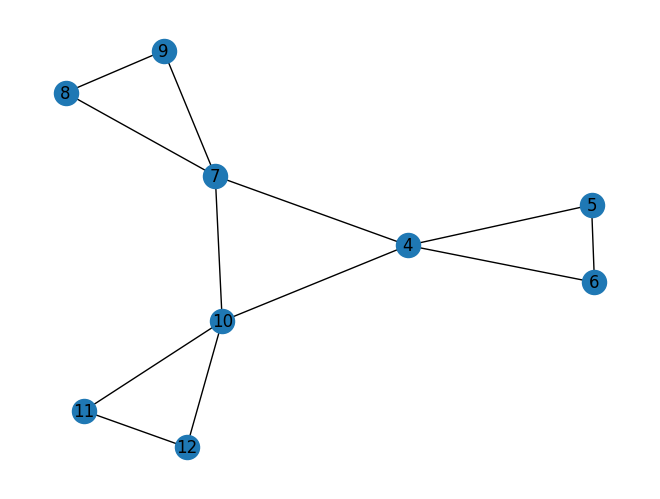

In [119]:
n = int(input("Введите количество вершин начальной фигуры: "))
polygon_graph = generate_polygon_graph(n)
fractal_graph = generate_fractal_graph(polygon_graph)

# Рассчитываем позиции вершин
pos = nx.spring_layout(fractal_graph)

nx.draw(fractal_graph, pos, with_labels=True)
plt.show()

Введите количество вершин начальной фигуры: 4


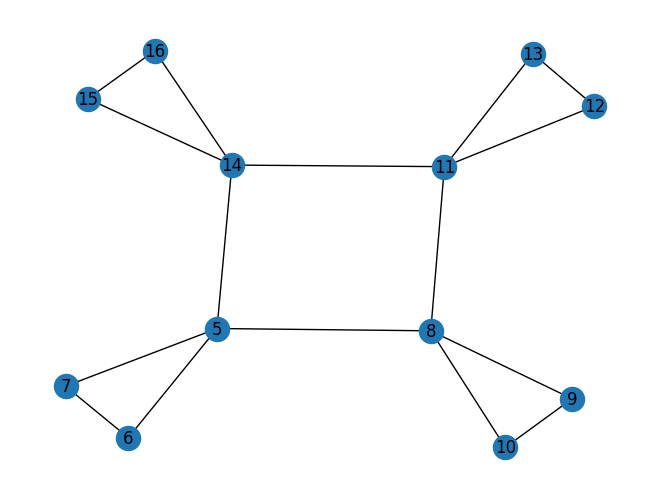

In [120]:
n = int(input("Введите количество вершин начальной фигуры: "))
polygon_graph = generate_polygon_graph(n)
fractal_graph = generate_fractal_graph(polygon_graph)

# Рассчитываем позиции вершин
pos = nx.spring_layout(fractal_graph)

nx.draw(fractal_graph, pos, with_labels=True)
plt.show()

#### **Теперь автоматизирую процесс, чтобы заменялись все изначальные вершины графа. А также добавлю возможность ввода параметра количества вершин для начального графа.**

In [121]:
def generate_polygon_graph(n):
    graph = nx.Graph()
    nodes = range(1, n + 1)
    graph.add_nodes_from(nodes)
    for i in range(1, n):
        graph.add_edge(i, i + 1)
    graph.add_edge(n, 1)
    return graph

In [122]:
def add_polygon_to_node(fractal_graph, node, n):
    new_nodes = [max(fractal_graph.nodes) + i for i in range(1, n+1)]
    fractal_graph.add_nodes_from(new_nodes)
    for i in range(n):
        next_index = i + 1 if i < n - 1 else 0
        fractal_graph.add_edge(new_nodes[i], new_nodes[next_index])
        fractal_graph.add_edge(new_nodes[i], node)
    return fractal_graph

In [123]:
def generate_fractal_graph(polygon_graph):
    fractal_graph = polygon_graph.copy()
    n = len(polygon_graph)
    new_nodes = []
    for node in polygon_graph.nodes:
        fractal_graph = add_polygon_to_node(fractal_graph, node, n)
        new_nodes.extend(list(fractal_graph.nodes)[-n:])

    # Удаляем исходные вершины полигона
    for node in polygon_graph.nodes:
        fractal_graph.remove_node(node)

    # Находим минимальные вершины для каждой фигуры
    min_nodes = [min(new_nodes[i:i+n]) for i in range(0, len(new_nodes), n)]

    # Добавляем ребра между минимальными вершинами фигур
    for i in range(len(min_nodes) - 1):
        fractal_graph.add_edge(min_nodes[i], min_nodes[i+1])
    fractal_graph.add_edge(min_nodes[-1], min_nodes[0])

    return fractal_graph

Введите количество вершин начальной фигуры: 3


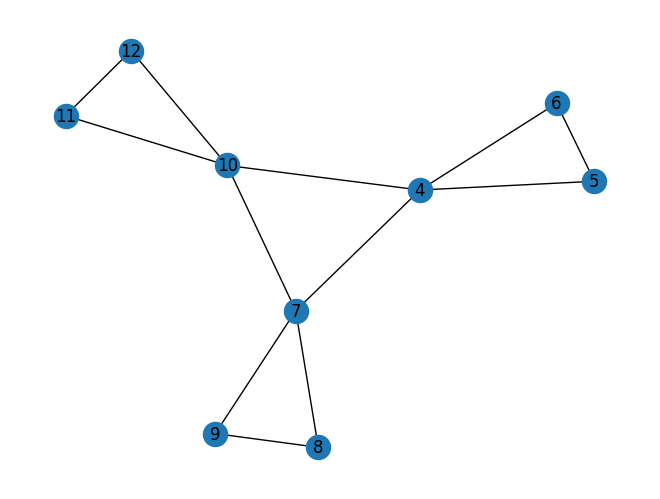

In [125]:
n = int(input("Введите количество вершин начальной фигуры: "))
polygon_graph = generate_polygon_graph(n)
fractal_graph = generate_fractal_graph(polygon_graph)

# Рассчитываем позиции вершин автоматически
pos = nx.spring_layout(fractal_graph)

nx.draw(fractal_graph, pos, with_labels=True)
plt.show()

Введите количество вершин начальной фигуры: 4


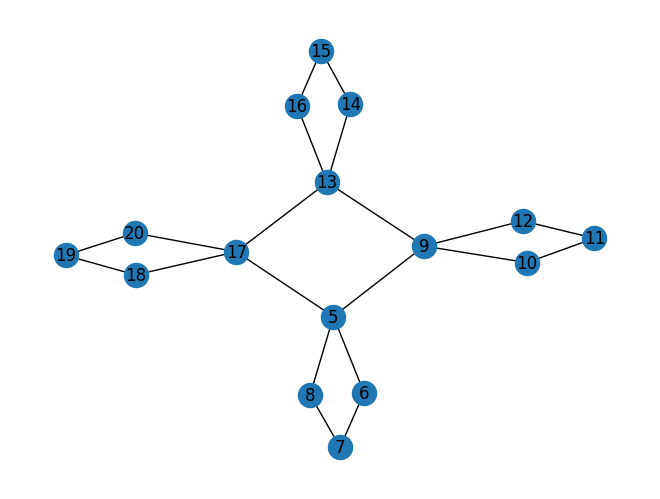

In [135]:
n = int(input("Введите количество вершин начальной фигуры: "))
polygon_graph = generate_polygon_graph(n)
fractal_graph = generate_fractal_graph(polygon_graph)

# Рассчитываем позиции вершин автоматически
pos = nx.spring_layout(fractal_graph)

nx.draw(fractal_graph, pos, with_labels=True)
plt.show()

### 2.	Выбрать (скачать) самостоятельно датасет (например, с kaggle.com, данные о дорожной сети, транспортных узлах и т.д.) и построить граф с географической привязкой данных.

###3.	Для решения задания использовать методы библиотеки networkx (источник: networkx.org). Реализовать алгоритм создания случайного, полносвязного графов и графа ближайшего соседства для узлов, сгенерированных на основе географической привязки.

###4.	Рассчитать среднюю степень вершины, средний минимальный путь и диаметр полученного графа

###5.	Проанализировать и выявить закономерности при их наличии (например, специфика регионов и т.п.)